<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/05_Pet_Breeds/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 727kB 6.6MB/s 
     |████████████████████████████████| 1.2MB 9.7MB/s 
     |████████████████████████████████| 204kB 24.8MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from fastbook import *

In [4]:
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))

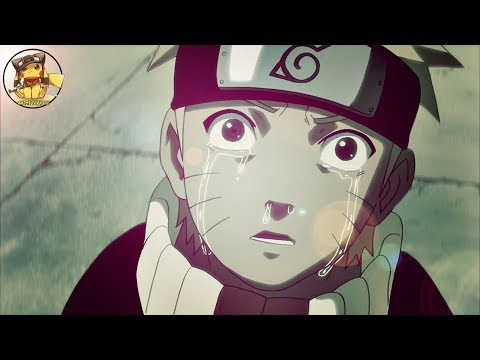

In [30]:
from IPython.display import Image
Image('/content/drive/MyDrive/movil/naruto2.jpg')

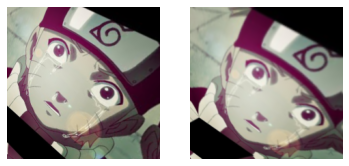

In [37]:
dls1 = dblock1.dataloaders([(Path.cwd()/'drive'/'MyDrive'/'movil'/'naruto2.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224),
                       Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)

TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1])

In [41]:
dls1.train.dataset

(#80) [(PILImage mode=RGB size=480x360, TensorCategory(0)),(PILImage mode=RGB size=480x360, TensorCategory(0)),(PILImage mode=RGB size=480x360, TensorCategory(0)),(PILImage mode=RGB size=480x360, TensorCategory(0)),(PILImage mode=RGB size=480x360, TensorCategory(0)),(PILImage mode=RGB size=480x360, TensorCategory(0)),(PILImage mode=RGB size=480x360, TensorCategory(0)),(PILImage mode=RGB size=480x360, TensorCategory(0)),(PILImage mode=RGB size=480x360, TensorCategory(0)),(PILImage mode=RGB size=480x360, TensorCategory(0))...]